In [1]:
source("/root/workspace/wj/Workspace/Vscode_Workspace/single-cell-continue/MIRACLE-master/preprocess/utils.R")
setwd("/root/workspace/wj/Workspace/Vscode_Workspace/single-cell-continue/MIRACLE-master/")
library(tibble)
library(RColorBrewer)
library(dynutils)
library(stringr)
library(Hmisc)
library(plyr)
library(gdata)
library(scales)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated

In [15]:
library(reshape)
lb <- as.data.frame(read.xls("/opt/data/private/wj/Workspace/Vscode_Workspace/single-cell-continue/MIRACLE-master/analysis/transfer_compare/label_transfer_PBMC.xlsx"))
lb <- melt(lb, id = "Method")
names(lb) <- c("Mapping strategy", "Task", "Micro F1-score")
lb[["Mapping strategy"]] <- factor(x = lb[["Mapping strategy"]], levels = c(
    "Generalize",
    "Transfer",
    "Continual"))
lb[["Task"]] <- factor(x = lb[["Task"]], levels = c(
    "ASAP",
    "ASAP_CITE",
    "NEAT"))
p <- ggplot(data = lb, aes(x = .data[["Task"]],
                           y = .data[["Micro F1-score"]],
                           fill = .data[["Mapping strategy"]], width = 0.5)) +
geom_bar(stat = "identity", position = position_dodge(width = 0.5 + 0.15)) +
scale_fill_brewer(palette = "Set1") +
  scale_y_continuous(
    limits = c(0.10, 1.00), oob = rescale_none,
    breaks = seq(0, 1, by = 0.10),
    expand = c(0, 0), # The vertical axis does not extend to either side
    # position = "top"  # Labels are located on the top
  ) +
  # scale_y_discrete(expand = expansion(add = c(0, 0.5))) +
  theme(
    panel.background = element_rect(fill = "white"), # Set background color to white
    panel.grid.major.y = element_line(color = "#A8BAC4", size = 0.3), # Set the color and the width of the grid lines for the horizontal axis
    panel.grid.major.x = element_blank(),
    axis.ticks.length = unit(0, "mm"), # Remove tick marks by setting their length to 0
    # axis.title = element_blank(), # Remove the title for both axes
    # axis.line.y.left = element_line(color = "black"), # Only left line of the vertical axis is painted in black
    # axis.text.y = element_blank(),
    axis.text.x = element_text(size = 11)
    # axis.text.x = element_text(family = "Econ Sans Cnd", size = 16)
  ) +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))


w <- 12
h <- 3
plt_size(w, h)
p

outdir <- "/root/workspace/wj/Workspace/Vscode_Workspace/single-cell-continue/MIRACLE-master/analysis/transfer_compare"
mkdir(outdir, remove_old = F)
ggsave(plot = p, file = pj(outdir, "label_transfer_score.png"), width = w, height = h, limitsize = F)
ggsave(plot = p, file = pj(outdir, "label_transfer_score.pdf"), width = w, height = h, limitsize = F)

Warning message:
"'gdata support for Excel files' is deprecated.
Use 'other packages, such as openxlsx, readxl, XLConnect, or xlsx' instead.
See help("Deprecated")"


In [2]:
library(reshape)
lb <- as.data.frame(read.xls("/opt/data/private/wj/Workspace/Vscode_Workspace/single-cell-continue/MIRACLE-master/analysis/transfer_compare/label_transfer_tissues_binary.xlsx"))
lb <- melt(lb, id = "Method")
names(lb) <- c("Mapping strategy", "Task", "Micro F1-score")
lb[["Mapping strategy"]] <- factor(x = lb[["Mapping strategy"]], levels = c(
    "Generalize",
    "Transfer",
    "Continual"))
lb[["Task"]] <- factor(x = lb[["Task"]], levels = c(
    "Tonsil",
    "BMMC",
    "Spleen"))
p <- ggplot(data = lb, aes(x = .data[["Task"]],
                           y = .data[["Micro F1-score"]],
                           fill = .data[["Mapping strategy"]], width = 0.5)) +
geom_bar(stat = "identity", position = position_dodge(width = 0.5 + 0.15)) +
scale_fill_brewer(palette = "Set1") +
  scale_y_continuous(
    limits = c(0.10, 1.00), oob = rescale_none,
    breaks = seq(0, 1, by = 0.10),
    expand = c(0, 0), # The vertical axis does not extend to either side
    # position = "top"  # Labels are located on the top
  ) +
  # scale_y_discrete(expand = expansion(add = c(0, 0.5))) +
  theme(
    panel.background = element_rect(fill = "white"), # Set background color to white
    panel.grid.major.y = element_line(color = "#A8BAC4", size = 0.3), # Set the color and the width of the grid lines for the horizontal axis
    panel.grid.major.x = element_blank(),
    axis.ticks.length = unit(0, "mm"), # Remove tick marks by setting their length to 0
    # axis.title = element_blank(), # Remove the title for both axes
    # axis.line.y.left = element_line(color = "black"), # Only left line of the vertical axis is painted in black
    # axis.text.y = element_blank(),
    axis.text.x = element_text(size = 11)
    # axis.text.x = element_text(family = "Econ Sans Cnd", size = 16)
  ) +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))+
  geom_text(
    data = subset(lb, is.na(lb[["Micro F1-score"]])),
    aes(y = 0.10, label = "NA"),
    hjust = 0,
    nudge_x = 0,
    colour = "black",
    size = 3,
    angle = 90
  )+
  geom_text(
    data = subset(lb, is.na(lb[["Micro F1-score"]])),
    aes(y = 0.10, label = "NA"),
    hjust = 0,
    nudge_x = -0.2,
    colour = "black",
    size = 3,
    angle = 90
  )+
  geom_text(
    data = subset(lb, is.na(lb[["Micro F1-score"]])),
    aes(y = 0.10, label = "NA"),
    hjust = 0,
    nudge_x = 0.2,
    colour = "black",
    size = 3,
    angle = 90
  )


w <- 10
h <- 3
plt_size(w, h)
p

outdir <- "/root/workspace/wj/Workspace/Vscode_Workspace/single-cell-continue/MIRACLE-master/analysis/transfer_compare"
mkdir(outdir, remove_old = F)
ggsave(plot = p, file = pj(outdir, "label_transfer_score_tissues_binary.png"), width = w, height = h, limitsize = F)
ggsave(plot = p, file = pj(outdir, "label_transfer_score_tissues_binary.pdf"), width = w, height = h, limitsize = F)


Attaching package: 'reshape'


The following objects are masked from 'package:plyr':

    rename, round_any


The following object is masked from 'package:Matrix':

    expand


The following object is masked from 'package:dplyr':

    rename


The following objects are masked from 'package:S4Vectors':

    expand, rename


Warning message:
"'gdata support for Excel files' is deprecated.
Use 'other packages, such as openxlsx, readxl, XLConnect, or xlsx' instead.
See help("Deprecated")"


Warning message:
"'gdata support for Excel files' is deprecated.
Use 'other packages, such as openxlsx, readxl, XLConnect, or xlsx' instead.
See help("Deprecated")"


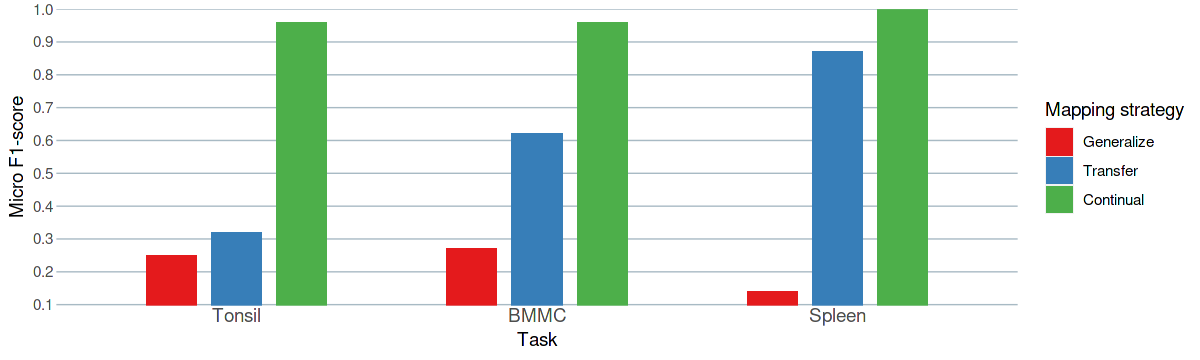

In [5]:
library(reshape)
lb <- as.data.frame(read.xls("/opt/data/private/wj/Workspace/Vscode_Workspace/single-cell-continue/MIRACLE-master/analysis/transfer_compare/label_transfer_tissues_micro.xlsx"))
lb <- melt(lb, id = "Method")
names(lb) <- c("Mapping strategy", "Task", "Micro F1-score")
lb[["Mapping strategy"]] <- factor(x = lb[["Mapping strategy"]], levels = c(
    "Generalize",
    "Transfer",
    "Continual"))
lb[["Task"]] <- factor(x = lb[["Task"]], levels = c(
    "Tonsil",
    "BMMC",
    "Spleen"))
p <- ggplot(data = lb, aes(x = .data[["Task"]],
                           y = .data[["Micro F1-score"]],
                           fill = .data[["Mapping strategy"]], width = 0.5)) +
geom_bar(stat = "identity", position = position_dodge(width = 0.5 + 0.15)) +
scale_fill_brewer(palette = "Set1") +
  scale_y_continuous(
    limits = c(0.10, 1.00), oob = rescale_none,
    breaks = seq(0, 1, by = 0.10),
    expand = c(0, 0), # The vertical axis does not extend to either side
    # position = "top"  # Labels are located on the top
  ) +
  # scale_y_discrete(expand = expansion(add = c(0, 0.5))) +
  theme(
    panel.background = element_rect(fill = "white"), # Set background color to white
    panel.grid.major.y = element_line(color = "#A8BAC4", size = 0.3), # Set the color and the width of the grid lines for the horizontal axis
    panel.grid.major.x = element_blank(),
    axis.ticks.length = unit(0, "mm"), # Remove tick marks by setting their length to 0
    # axis.title = element_blank(), # Remove the title for both axes
    # axis.line.y.left = element_line(color = "black"), # Only left line of the vertical axis is painted in black
    # axis.text.y = element_blank(),
    axis.text.x = element_text(size = 11)
    # axis.text.x = element_text(family = "Econ Sans Cnd", size = 16)
  ) +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))


w <- 10
h <- 3
plt_size(w, h)
p

outdir <- "/root/workspace/wj/Workspace/Vscode_Workspace/single-cell-continue/MIRACLE-master/analysis/transfer_compare"
mkdir(outdir, remove_old = F)
ggsave(plot = p, file = pj(outdir, "label_transfer_score_tissues_micro.png"), width = w, height = h, limitsize = F)
ggsave(plot = p, file = pj(outdir, "label_transfer_score_tissues_micro.pdf"), width = w, height = h, limitsize = F)